<a href="https://colab.research.google.com/github/agmalaga2020/PolicySpace2_Spanish_data/blob/main/cifras_poblacion_municipio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INICIO

- 1º buscamos fuente a explorar
https://uoc0-my.sharepoint.com/:x:/g/personal/agmalaga_uoc_edu/EVrtEuZkGqxMsXz3ENcmP8sB8w9sxyyFWBX3pDP282BDaQ?e=hZX8jz

_______________________________________________________________

- 2º `CARGAMOS` DATAFRAME ORIGINAL del proyecto **github**
https://github.com/agmalaga2020/PolicySpace2-agmalaga/tree/master/input

_______________________________________________________________
- 3º Realizamos analisis exploratorio en google colab.
_______________________________________________________________

- 4º descargamos datos y creamos informe.
_______________________________________________________________

- 5º actualizar LINK de la columna `NOTEBOOK`
https://uoc0-my.sharepoint.com/:x:/g/personal/agmalaga_uoc_edu/EVrtEuZkGqxMsXz3ENcmP8sB8w9sxyyFWBX3pDP282BDaQ?e=hZX8jz

_______________________________________________________________

ESQUEMA DE PROCESO

https://whiteboard.office.com/me/whiteboards/p/c3BvOmh0dHBzOi8vdW9jMC1teS5zaGFyZXBvaW50LmNvbS9wZXJzb25hbC9hZ21hbGFnYV91b2NfZWR1/b!r4X97qYbxUyQGQNSpn-bfrNi376yDThFsrR2Kul1sxTx_nU34TfBSpdz-6pNWzvq/01E765GIPQJMS23ADWVBEID5XGUDPDSQNZ?source=applauncher&auth_upn=agmalaga%40uoc.edu

### pop_men_2000.csv "ejemplo"


https://github.com/agmalaga2020/PolicySpace2-agmalaga/blob/master/input/pop_men_2000.csv

In [44]:
import requests
import pandas as pd
import io

# Update the URL to point to the raw CSV data on GitHub
url = 'https://raw.githubusercontent.com/agmalaga2020/PolicySpace2-agmalaga/master/input/pop_men_2000.csv'
s = requests.get(url).content

# Read the CSV data using ';' as the separator
df_original = pd.read_csv(io.StringIO(s.decode('utf-8')), sep=';')

print(df_original.head())
print("el dataframe original de brasil contiene un total de municipios:", df_original.cod_mun.unique().shape[0])

   cod_mun     0     1     2     3     4     5     6     7     8  ...  91  92  \
0  2700102   228   205   252   255   259   255   233   219   226  ...   1   1   
1  2700201   210   223   202   229   194   222   221   227   212  ...   0   0   
2  2700300  2140  2054  2052  2098  2210  2241  2123  2023  2071  ...  12  16   
3  2700409   508   508   544   520   586   587   535   445   511  ...   4   2   
4  2700508   175   161   164   159   177   179   142   132   149  ...   1   1   

   93  94  95  96  97  98  99  100  
0   3   1   1   1   0   1   0    5  
1   1   3   1   0   0   0   0    0  
2   7   9   7   8   9   4   2   13  
3   0   3   2   1   2   1   0    6  
4   2   1   0   0   0   0   0    1  

[5 rows x 102 columns]
el dataframe original de brasil contiene un total de municipios: 5485


# ESPAÑA

tenemos que extraer tabla a tabla por municipio para finalmente transformar los datos para conseeguir el mismo resultado.

### Población por sexo, municipios y edad (año a año) - Nacional

https://www.ine.es/jaxiT3/Tabla.htm?t=33575&L=0

# ocupa mas de 2 gb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### extraemos las tablas

In [ ]:
import requests
import pandas as pd

# Código de la tabla
table_code = "33575"
url_csv = f"https://servicios.ine.es/wstempus/csv/ES/DATOS_TABLA/{table_code}?nult=999"

response = requests.get(url_csv)

if response.status_code == 200:
    csv_data = response.content.decode('utf-8')

    # Guardar el archivo CSV con un nombre adecuado
    file_name = "tabla_33847.csv"
    with open(file_name, "w", encoding="utf-8") as f:
        f.write(csv_data)
    print(f"Archivo CSV guardado como '{file_name}'")
else:
    print("Error en la petición: ❌", response.status_code)

# Leer el CSV
df = pd.read_csv(file_name, sep='\t', encoding='utf-8')

# Mostrar las primeras filas
print(df.head())
print("Tabla actualizada conseguida ✅")

try:
  df.to_csv('/content/33575.csv', index=False)
  print("✅ Copia de df_nuevo_filtrado_2 guardada en '/content/33575.csv'")
except NameError:
  print("⚠️ df no está definido. No se puede guardar la copia.")
print("Se ha guardado una copia del DataFrame df.")


In [ ]:
!pip install polars

In [ ]:
import polars as pl

file_path = '/content/drive/Othercomputers/Mi PC (1)/GOOGLE DRIVE/DATA PESADA/33575.csv'

df = pl.read_csv(
    file_path,
    truncate_ragged_lines=True,  # Ignora columnas extra en filas con formato roto
    has_header=True,             # O False si no tiene cabecera
    separator="\t",               # <-- Importante: separador correcto
    ignore_errors=True           # Evita que pare si hay errores de parseo
)

print(df.shape)
print(df.head())

(49792320, 5)
shape: (5, 5)
┌───────┬────────────────┬──────────────────┬────────────────────┬────────────┐
│ Sexo  ┆ Municipios     ┆ Edad (año a año) ┆ Periodo            ┆ Total      │
│ ---   ┆ ---            ┆ ---              ┆ ---                ┆ ---        │
│ str   ┆ str            ┆ str              ┆ str                ┆ str        │
╞═══════╪════════════════╪══════════════════╪════════════════════╪════════════╡
│ Total ┆ Total Nacional ┆ Todas las edades ┆ 1 de enero de 2022 ┆ 47.475.420 │
│ Total ┆ Total Nacional ┆ Todas las edades ┆ 1 de enero de 2021 ┆ 47.385.107 │
│ Total ┆ Total Nacional ┆ Todas las edades ┆ 1 de enero de 2020 ┆ 47.450.795 │
│ Total ┆ Total Nacional ┆ Todas las edades ┆ 1 de enero de 2019 ┆ 47.026.208 │
│ Total ┆ Total Nacional ┆ Todas las edades ┆ 1 de enero de 2018 ┆ 46.722.980 │
└───────┴────────────────┴──────────────────┴────────────────────┴────────────┘



| **Columna Original**       | **Nueva Columna(s)**             | **Transformación**                                                                 |
|---------------------------|----------------------------------|-------------------------------------------------------------------------------------|
| `Sexo`                    | `sexo`                           | Renombrar a minúsculas. Filtrar solo `'Hombres'` y `'Mujeres'`. Excluir `'Total'`. |
| `Municipios`              | `municipio_name`                 | Renombrar. No hay código, así que solo nos quedamos con el nombre.                 |
| `Edad (año a año)`        | `edad`                           | Renombrar. Excluir `'Todas las edades'`. Mantener solo edades numéricas.           |
| `Periodo`                 | `periodo`                        | Renombrar. Extraer solo el año.                                                    |
| `Total`                   | `total`                          | Renombrar. Convertir a tipo numérico eliminando separadores de miles.              |



In [ ]:
# valores vacion en TOTAL

df.filter(pl.col("Total").cast(str).str.strip_chars() == "").shape


(101898, 5)

In [ ]:
# Convertir columna 'Total' a float quitando puntos, controlando valores vacíos
df_copia = df.clone()

df_copia = df_copia.with_columns([
    pl.col("Total")
      .cast(str)
      .str.strip_chars()
      .str.replace_all(r"\.", "")
      .map_elements(lambda x: None if x == "" else x, return_dtype=pl.Utf8)
      .cast(pl.Float64)
])


In [ ]:
def print_unique_values_and_len(df):
    """Imprime los valores únicos de cada columna en un DataFrame de Polars y su longitud."""
    for column in df_copia.columns:
        unique_values = df_copia.select(column).unique().to_series()
        nan_count = df_copia.select(pl.col(column).is_null().sum()).item()
        dtype = df_copia.schema[column]

        print(f"Valores únicos de la columna '{column}':")
        print(unique_values)
        print(f"Longitud de valores únicos: {len(unique_values)}")
        print(f"Número de NaN: {nan_count}")
        print(f"Tipo de dato de la columna: {dtype}")
        print()
print_unique_values_and_len(df_copia)


Valores únicos de la columna 'Sexo':
shape: (3,)
Series: 'Sexo' [str]
[
	"Hombres"
	"Mujeres"
	"Total"
]
Longitud de valores únicos: 3
Número de NaN: 0
Tipo de dato de la columna: String

Valores únicos de la columna 'Municipios':
shape: (8_136,)
Series: 'Municipios' [str]
[
	"26173 Villarroya"
	"13043 Fuenllana"
	"03901 Poblets, els"
	"43118 Pratdip"
	"04021 Bayarque"
	…
	"44228 Torremocha de Jiloca"
	"19076 Castellar de la Muela"
	"24101 Murias de Paredes"
	"34151 Respenda de la Peña"
	"40229 Villaverde de Montejo"
]
Longitud de valores únicos: 8136
Número de NaN: 0
Tipo de dato de la columna: String

Valores únicos de la columna 'Edad (año a año)':
shape: (102,)
Series: 'Edad (año a año)' [str]
[
	"1 año"
	"30 años"
	"24 años"
	"84 años"
	"12 años"
	…
	"51 años"
	"78 años"
	"86 años"
	"82 años"
	"94 años"
]
Longitud de valores únicos: 102
Número de NaN: 0
Tipo de dato de la columna: String

Valores únicos de la columna 'Periodo':
shape: (20,)
Series: 'Periodo' [str]
[
	"1 de enero d

### plan de preprocesamiento.


| **Columna Original**       | **Nueva Columna(s)**             | **Transformación**                                                                 |
|---------------------------|----------------------------------|-------------------------------------------------------------------------------------|
| `Sexo`                    | `sexo`                           | Renombrar a minúsculas. Filtrar solo `'Hombres'` y `'Mujeres'`. Excluir `'Total'`. |
| `Municipios`              | `municipio_name`, `municipio_code` | Separar código y nombre si están en formato `"XXXXX Nombre"`.                      |
| `Edad (año a año)`        | `edad`                           | Renombrar. Excluir `'Todas las edades'`. Extraer solo el número.                   |
| `Periodo`                 | `periodo`                        | Renombrar. Extraer solo el año.                                                    |
| `Total`                   | `total`                          | Renombrar. Convertir a numérico (`float`), eliminando puntos como separadores.     |

🔎 **Adiciones importantes**:
- En `Municipios`, ahora que sabemos que están en formato `"Código Nombre"` como `"08080 Fígols"`, conviene separar el código (`municipio_code`) y el nombre (`municipio_name`).
- `Total` incluye puntos como separador de miles, así que necesitamos convertir correctamente a `float` tras eliminar los puntos.



### filtramos

In [ ]:
df_copia.filter(~pl.col("Municipios").str.contains(r"^\d{5}\s"))


Sexo,Municipios,Edad (año a año),Periodo,Total
str,str,str,str,f64
"""Total""","""Total Nacional""","""Todas las edades""","""1 de enero de 2022""",4.747542e7
"""Total""","""Total Nacional""","""Todas las edades""","""1 de enero de 2021""",4.7385107e7
"""Total""","""Total Nacional""","""Todas las edades""","""1 de enero de 2020""",4.7450795e7
"""Total""","""Total Nacional""","""Todas las edades""","""1 de enero de 2019""",4.7026208e7
"""Total""","""Total Nacional""","""Todas las edades""","""1 de enero de 2018""",4.672298e7
…,…,…,…,…
"""Mujeres""","""Total Nacional""","""100 y más años""","""1 de enero de 2007""",6312.0
"""Mujeres""","""Total Nacional""","""100 y más años""","""1 de enero de 2006""",7586.0
"""Mujeres""","""Total Nacional""","""100 y más años""","""1 de enero de 2005""",6775.0


### eliminamos si en Municipios = Total Nacional

In [ ]:
df_copia = df_copia.filter(pl.col("Municipios") != "Total Nacional")
df_copia.filter(~pl.col("Municipios").str.contains(r"^\d{5}\s"))


Sexo,Municipios,Edad (año a año),Periodo,Total
str,str,str,str,f64


In [ ]:
df_copia_copia = df_copia.clone()


# Renombrar columnas para trabajar
df_copia_copia = df_copia_copia.rename({
    "Sexo": "sexo",
    "Municipios": "municipios",
    "Edad (año a año)": "edad",
    "Periodo": "periodo",
    "Total": "total"
})

# Filtrar solo 'Hombres' y 'Mujeres'
df_copia_copia = df_copia_copia.filter(pl.col("sexo").is_in(["Hombres", "Mujeres"]))

# Excluir 'Todas las edades'
df_copia_copia = df_copia_copia.filter(pl.col("edad") != "Todas las edades")

# Extraer año del periodo (asumimos que es tipo texto como '2022')
df_copia_copia = df_copia_copia.with_columns([
    pl.col("periodo").cast(str).str.extract(r"(\d{4})").alias("periodo")
])

# Extraer número de edad (si viene como "35 años", por ejemplo)
df_copia_copia = df_copia_copia.with_columns([
    pl.col("edad").str.extract(r"(\d+)").cast(pl.Int64).alias("edad")
])

# Separar código y nombre del municipio
df_copia_copia = df_copia_copia.with_columns([
    pl.col("municipios").str.extract(r"^(\d{5})").alias("municipio_code"),
    pl.col("municipios").str.extract(r"\d{5}\s+(.*)").alias("municipio_name")
])

# Luego convertimos a float
df_copia_copia = df_copia_copia.with_columns([
    pl.col("total").cast(pl.Float64)
])

In [ ]:
# Seleccionar solo las columnas finales
df_final = df_copia_copia.select([
    "sexo", "municipio_code", "municipio_name", "edad", "periodo", "total"
])


In [ ]:
print(df_final.shape)
print(df_final.head())

(32865400, 6)
shape: (5, 6)
┌─────────┬────────────────┬────────────────┬──────┬─────────┬───────┐
│ sexo    ┆ municipio_code ┆ municipio_name ┆ edad ┆ periodo ┆ total │
│ ---     ┆ ---            ┆ ---            ┆ ---  ┆ ---     ┆ ---   │
│ str     ┆ str            ┆ str            ┆ i64  ┆ str     ┆ f64   │
╞═════════╪════════════════╪════════════════╪══════╪═════════╪═══════╡
│ Hombres ┆ 44001          ┆ Ababuj         ┆ 0    ┆ 2022    ┆ 0.0   │
│ Hombres ┆ 44001          ┆ Ababuj         ┆ 0    ┆ 2021    ┆ 0.0   │
│ Hombres ┆ 44001          ┆ Ababuj         ┆ 0    ┆ 2020    ┆ 0.0   │
│ Hombres ┆ 44001          ┆ Ababuj         ┆ 0    ┆ 2019    ┆ 0.0   │
│ Hombres ┆ 44001          ┆ Ababuj         ┆ 0    ┆ 2018    ┆ 0.0   │
└─────────┴────────────────┴────────────────┴──────┴─────────┴───────┘


In [ ]:
def print_unique_values_and_len(df):
    """Imprime los valores únicos de cada columna en un DataFrame de Polars y su longitud."""
    for column in df_final.columns:
        unique_values = df_final.select(column).unique().to_series()
        nan_count = df_final.select(pl.col(column).is_null().sum()).item()
        dtype = df_final.schema[column]

        print(f"Valores únicos de la columna '{column}':")
        print(unique_values)
        print(f"Longitud de valores únicos: {len(unique_values)}")
        print(f"Número de NaN: {nan_count}")
        print(f"Tipo de dato de la columna: {dtype}")
        print()
print_unique_values_and_len(df)

Valores únicos de la columna 'sexo':
shape: (2,)
Series: 'sexo' [str]
[
	"Mujeres"
	"Hombres"
]
Longitud de valores únicos: 2
Número de NaN: 0
Tipo de dato de la columna: String

Valores únicos de la columna 'municipio_code':
shape: (8_135,)
Series: 'municipio_code' [str]
[
	"10027"
	"05053"
	"45053"
	"50280"
	"31134"
	…
	"14043"
	"19321"
	"06066"
	"29004"
	"03084"
]
Longitud de valores únicos: 8135
Número de NaN: 0
Tipo de dato de la columna: String

Valores únicos de la columna 'municipio_name':
shape: (8_118,)
Series: 'municipio_name' [str]
[
	"Palazuelos de Eresma"
	"Alforque"
	"Villarrubio"
	"Tamariz de Campos"
	"Bergara"
	…
	"Mugardos"
	"Miguel Esteban"
	"Zafrilla"
	"Valdenebro"
	"Villarreal de Huerva"
]
Longitud de valores únicos: 8118
Número de NaN: 0
Tipo de dato de la columna: String

Valores únicos de la columna 'edad':
shape: (101,)
Series: 'edad' [i64]
[
	24
	13
	58
	51
	90
	…
	20
	98
	95
	23
	56
]
Longitud de valores únicos: 101
Número de NaN: 0
Tipo de dato de la columna

In [ ]:
print(df_final.shape)
print(df_final.head())

(32865400, 6)
shape: (5, 6)
┌─────────┬────────────────┬────────────────┬──────┬─────────┬───────┐
│ sexo    ┆ municipio_code ┆ municipio_name ┆ edad ┆ periodo ┆ total │
│ ---     ┆ ---            ┆ ---            ┆ ---  ┆ ---     ┆ ---   │
│ str     ┆ str            ┆ str            ┆ i64  ┆ str     ┆ f64   │
╞═════════╪════════════════╪════════════════╪══════╪═════════╪═══════╡
│ Hombres ┆ 44001          ┆ Ababuj         ┆ 0    ┆ 2022    ┆ 0.0   │
│ Hombres ┆ 44001          ┆ Ababuj         ┆ 0    ┆ 2021    ┆ 0.0   │
│ Hombres ┆ 44001          ┆ Ababuj         ┆ 0    ┆ 2020    ┆ 0.0   │
│ Hombres ┆ 44001          ┆ Ababuj         ┆ 0    ┆ 2019    ┆ 0.0   │
│ Hombres ┆ 44001          ┆ Ababuj         ┆ 0    ┆ 2018    ┆ 0.0   │
└─────────┴────────────────┴────────────────┴──────┴─────────┴───────┘


In [ ]:
df_final = df_final.with_columns([
    pl.col("total")
      .cast(str)
      .str.strip_chars()
      .str.replace_all(r"\.", "")
      .map_elements(lambda x: x if x.isdigit() else None, return_dtype=pl.Utf8)
      .cast(pl.Float64)
])


### guardamos copia de df_final

In [ ]:
# prompt: guardamos df_final en google drive

try:
  df_final.write_csv('/content/drive/Othercomputers/Mi PC (1)/GOOGLE DRIVE/DATA PESADA/df_final.csv')
  print("✅ DataFrame df_final guardado en Google Drive.")
except NameError:
  print("⚠️ df_final no está definido. No se puede guardar en Google Drive.")

✅ DataFrame df_final guardado en Google Drive.


In [ ]:
import polars as pl

# file_path = '/content/drive/Othercomputers/Mi PC (1)/GOOGLE DRIVE/DATA PESADA/df_final.csv'

# df_final = pl.read_csv(file_path)


In [ ]:
df_final.select([
    pl.col("total").null_count().alias("NaNs en total"),
    pl.col("total").min().alias("total_min"),
    pl.col("total").max().alias("total_max"),
    pl.col("total").mean().alias("total_media")
])
# nan antes 67266 --> tenemos los mismos

NaNs en total,total_min,total_max,total_media
u32,f64,f64,f64
67266,0.0,313030.0,281.732067


In [ ]:
df_final.select(
    pl.col("total")
    .cast(str)
    .str.strip_chars()
    .str.replace_all(r"\.", "")
    .unique()
    .sort()
)


total
str
null
"""00"""
"""100"""
"""1000"""
"""10000"""
…
"""999100"""
"""999200"""
"""999500"""


### tratamos null

In [ ]:
df_final = df_final.with_columns([
    pl.col("total")
      .cast(str)
      .str.strip_chars()
      .str.replace_all(r"\.", "")
      .map_elements(lambda x: None if x in ["", "null"] else x, return_dtype=pl.Utf8)
      .cast(pl.Float64)
])


In [ ]:

print(df_final.select(pl.col("total").null_count()).item())


67266


In [ ]:
df_final.select(
    pl.col("total")
    .cast(str)
    .str.strip_chars()
    .str.replace_all(r"\.", "")
    .unique()
    .sort()
)


total
str
null
"""00"""
"""1000"""
"""10000"""
"""100000"""
…
"""9991000"""
"""9992000"""
"""9995000"""


In [ ]:
df_final = df_final.with_columns([
    pl.when(
        (pl.col("total").cast(str).str.strip_chars().str.replace_all(r"\.", "") == "") |
        (pl.col("total").cast(str).str.strip_chars().str.replace_all(r"\.", "") == "null")
    )
    .then(None)
    .otherwise(
        pl.col("total").cast(str).str.strip_chars().str.replace_all(r"\.", "")
    )
    .cast(pl.Float64)
    .alias("total")
])


In [ ]:
df_final.select(
    pl.col("total")
    .cast(str)
    .str.strip_chars()
    .str.replace_all(r"\.", "")
    .unique()
    .sort()
)


total
str
null
"""00"""
"""10000"""
"""100000"""
"""1000000"""
…
"""99910000"""
"""99920000"""
"""99950000"""


In [ ]:
df_final.select([
    pl.col("total").is_null().sum().alias("nulos_reales"),
    pl.col("total").drop_nulls().cast(str).unique().sort().alias("valores_validos")
])
df_final.filter(pl.col("total").is_null())


sexo,municipio_code,municipio_name,edad,periodo,total
str,i64,str,i64,i64,f64
"""Hombres""",10903,"""Alagón del Río""",0,2009,null
"""Hombres""",10903,"""Alagón del Río""",0,2008,null
"""Hombres""",10903,"""Alagón del Río""",0,2007,null
"""Hombres""",10903,"""Alagón del Río""",0,2006,null
"""Hombres""",10903,"""Alagón del Río""",0,2005,null
…,…,…,…,…,…
"""Mujeres""",48915,"""Ziortza-Bolibar""",99,2004,null
"""Mujeres""",48915,"""Ziortza-Bolibar""",99,2003,null
"""Mujeres""",48915,"""Ziortza-Bolibar""",100,2005,null


In [ ]:
import pandas as pd
df_municipio_10903 = df_final.filter(pl.col("municipio_code") == 10903)
df_municipio_10903


sexo,municipio_code,municipio_name,edad,periodo,total
str,i64,str,i64,i64,f64
"""Hombres""",10903,"""Alagón del Río""",0,2022,3000.0
"""Hombres""",10903,"""Alagón del Río""",0,2021,2000.0
"""Hombres""",10903,"""Alagón del Río""",0,2020,3000.0
"""Hombres""",10903,"""Alagón del Río""",0,2019,4000.0
"""Hombres""",10903,"""Alagón del Río""",0,2018,4000.0
…,…,…,…,…,…
"""Mujeres""",10903,"""Alagón del Río""",100,2007,null
"""Mujeres""",10903,"""Alagón del Río""",100,2006,null
"""Mujeres""",10903,"""Alagón del Río""",100,2005,null


shape: (4_040, 6)
┌─────────┬────────────────┬────────────────┬──────┬─────────┬────────┐
│ sexo    ┆ municipio_code ┆ municipio_name ┆ edad ┆ periodo ┆ total  │
│ ---     ┆ ---            ┆ ---            ┆ ---  ┆ ---     ┆ ---    │
│ str     ┆ i64            ┆ str            ┆ i64  ┆ i64     ┆ f64    │
╞═════════╪════════════════╪════════════════╪══════╪═════════╪════════╡
│ Hombres ┆ 10903          ┆ Alagón del Río ┆ 0    ┆ 2022    ┆ 3000.0 │
│ Hombres ┆ 10903          ┆ Alagón del Río ┆ 0    ┆ 2021    ┆ 2000.0 │
│ Hombres ┆ 10903          ┆ Alagón del Río ┆ 0    ┆ 2020    ┆ 3000.0 │
│ Hombres ┆ 10903          ┆ Alagón del Río ┆ 0    ┆ 2019    ┆ 4000.0 │
│ Hombres ┆ 10903          ┆ Alagón del Río ┆ 0    ┆ 2018    ┆ 4000.0 │
│ …       ┆ …              ┆ …              ┆ …    ┆ …       ┆ …      │
│ Mujeres ┆ 10903          ┆ Alagón del Río ┆ 100  ┆ 2007    ┆ null   │
│ Mujeres ┆ 10903          ┆ Alagón del Río ┆ 100  ┆ 2006    ┆ null   │
│ Mujeres ┆ 10903          ┆ Alagón del Río ┆ 

### completamos con 0 los valores null

In [ ]:
df_final = df_final.with_columns([
    pl.col("total").fill_null(0.0)
])


In [ ]:
print(df_final.select(pl.col("total").null_count()).item())


0


### creamos datasets más pequeños



In [ ]:
cifras_poblacion_municipio_men_total = df_final.filter(pl.col("sexo") == "Hombres")
cifras_poblacion_municipio_women_total = df_final.filter(pl.col("sexo") == "Mujeres")

In [ ]:
periodos = df_final.select(pl.col("periodo").unique()).sort("periodo")["periodo"].to_list()
periodos

[2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [ ]:
# Diccionarios para guardar los resultados
cifras_poblacion_municipio_men = {}
cifras_poblacion_municipio_women = {}

for anio in periodos:
    cifras_poblacion_municipio_men[anio] = cifras_poblacion_municipio_men_total.filter(pl.col("periodo") == anio)
    cifras_poblacion_municipio_women[anio] = cifras_poblacion_municipio_women_total.filter(pl.col("periodo") == anio)


In [ ]:
for anio in periodos:
    try:
        men_path = f"/content/drive/Othercomputers/Mi PC (1)/GOOGLE DRIVE/DATA PESADA/cifras_municipio_hombres_{anio}.csv"
        cifras_poblacion_municipio_men[anio].write_csv(men_path)
        print(f"✅ Guardado: {men_path}")
    except Exception as e:
        print(f"❌ Error al guardar {men_path}: {e}")

    try:
        women_path = f"/content/drive/Othercomputers/Mi PC (1)/GOOGLE DRIVE/DATA PESADA/cifras_municipio_mujeres_{anio}.csv"
        cifras_poblacion_municipio_women[anio].write_csv(women_path)
        print(f"✅ Guardado: {women_path}")
    except Exception as e:
        print(f"❌ Error al guardar {women_path}: {e}")


✅ Guardado: /content/drive/Othercomputers/Mi PC (1)/GOOGLE DRIVE/DATA PESADA/cifras_municipio_hombres_2003.csv
✅ Guardado: /content/drive/Othercomputers/Mi PC (1)/GOOGLE DRIVE/DATA PESADA/cifras_municipio_mujeres_2003.csv
✅ Guardado: /content/drive/Othercomputers/Mi PC (1)/GOOGLE DRIVE/DATA PESADA/cifras_municipio_hombres_2004.csv
✅ Guardado: /content/drive/Othercomputers/Mi PC (1)/GOOGLE DRIVE/DATA PESADA/cifras_municipio_mujeres_2004.csv
✅ Guardado: /content/drive/Othercomputers/Mi PC (1)/GOOGLE DRIVE/DATA PESADA/cifras_municipio_hombres_2005.csv
✅ Guardado: /content/drive/Othercomputers/Mi PC (1)/GOOGLE DRIVE/DATA PESADA/cifras_municipio_mujeres_2005.csv
✅ Guardado: /content/drive/Othercomputers/Mi PC (1)/GOOGLE DRIVE/DATA PESADA/cifras_municipio_hombres_2006.csv
✅ Guardado: /content/drive/Othercomputers/Mi PC (1)/GOOGLE DRIVE/DATA PESADA/cifras_municipio_mujeres_2006.csv
✅ Guardado: /content/drive/Othercomputers/Mi PC (1)/GOOGLE DRIVE/DATA PESADA/cifras_municipio_hombres_2007.csv
✅

### tamaño de los dataset

In [ ]:
for anio in periodos:
    n_hombres = cifras_poblacion_municipio_men[anio].shape[0]
    n_mujeres = cifras_poblacion_municipio_women[anio].shape[0]

    print(f"📅 {anio} - Hombres: {n_hombres} filas")
    print(f"📅 {anio} - Mujeres: {n_mujeres} filas\n")


📅 2003 - Hombres: 821635 filas
📅 2003 - Mujeres: 821635 filas

📅 2004 - Hombres: 821635 filas
📅 2004 - Mujeres: 821635 filas

📅 2005 - Hombres: 821635 filas
📅 2005 - Mujeres: 821635 filas

📅 2006 - Hombres: 821635 filas
📅 2006 - Mujeres: 821635 filas

📅 2007 - Hombres: 821635 filas
📅 2007 - Mujeres: 821635 filas

📅 2008 - Hombres: 821635 filas
📅 2008 - Mujeres: 821635 filas

📅 2009 - Hombres: 821635 filas
📅 2009 - Mujeres: 821635 filas

📅 2010 - Hombres: 821635 filas
📅 2010 - Mujeres: 821635 filas

📅 2011 - Hombres: 821635 filas
📅 2011 - Mujeres: 821635 filas

📅 2012 - Hombres: 821635 filas
📅 2012 - Mujeres: 821635 filas

📅 2013 - Hombres: 821635 filas
📅 2013 - Mujeres: 821635 filas

📅 2014 - Hombres: 821635 filas
📅 2014 - Mujeres: 821635 filas

📅 2015 - Hombres: 821635 filas
📅 2015 - Mujeres: 821635 filas

📅 2016 - Hombres: 821635 filas
📅 2016 - Mujeres: 821635 filas

📅 2017 - Hombres: 821635 filas
📅 2017 - Mujeres: 821635 filas

📅 2018 - Hombres: 821635 filas
📅 2018 - Mujeres: 821635

In [ ]:
# Lista para guardar resultados de resumenes anuales
resumen_anual = []

for anio in periodos:
    total_hombres = cifras_poblacion_municipio_men[anio]["total"].sum()
    total_mujeres = cifras_poblacion_municipio_women[anio]["total"].sum()

    resumen_anual.append({
        "anio": anio,
        "hombres": total_hombres,
        "mujeres": total_mujeres
    })


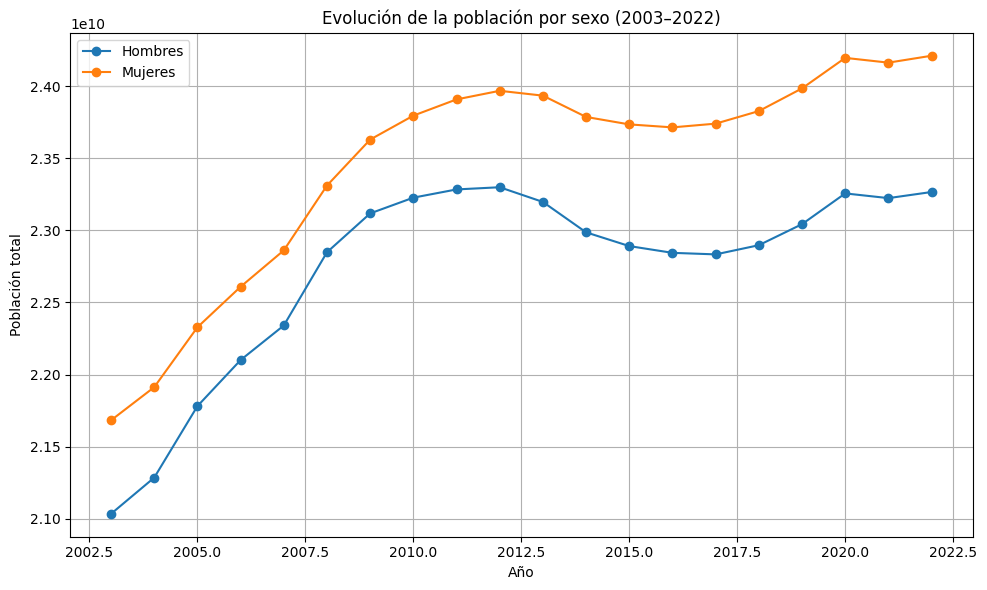

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_resumen = pd.DataFrame(resumen_anual)

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_resumen["anio"], df_resumen["hombres"], marker='o', label="Hombres")
plt.plot(df_resumen["anio"], df_resumen["mujeres"], marker='o', label="Mujeres")
plt.title("Evolución de la población por sexo (2003–2022)")
plt.xlabel("Año")
plt.ylabel("Población total")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Buscar "Melilla" en los nombres de municipio
df_final.filter(pl.col("municipio_name").str.contains("Melilla")).select("municipio_code", "municipio_name").unique()
cifras_melilla_hombres = {}
cifras_melilla_mujeres = {}

for anio in periodos:
    cifras_melilla_hombres[anio] = cifras_poblacion_municipio_men[anio].filter(pl.col("municipio_name") == "Melilla")
    cifras_melilla_mujeres[anio] = cifras_poblacion_municipio_women[anio].filter(pl.col("municipio_name") == "Melilla")
resumen_melilla = []

for anio in periodos:
    total_h = cifras_melilla_hombres[anio]["total"].sum()
    total_m = cifras_melilla_mujeres[anio]["total"].sum()

    resumen_melilla.append({
        "anio": anio,
        "hombres": total_h,
        "mujeres": total_m
    })


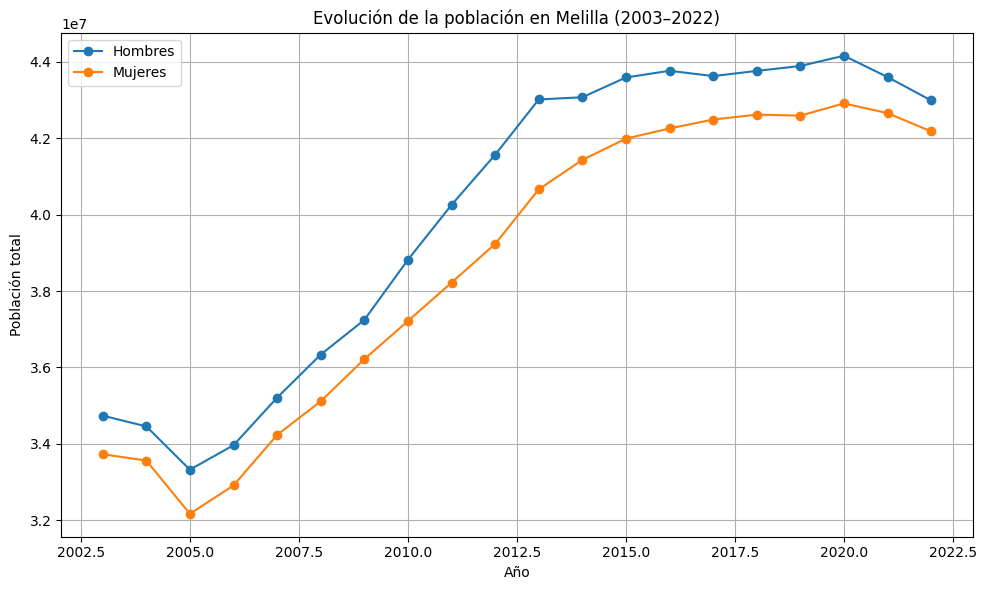

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_melilla = pd.DataFrame(resumen_melilla)

plt.figure(figsize=(10, 6))
plt.plot(df_melilla["anio"], df_melilla["hombres"], marker='o', label="Hombres")
plt.plot(df_melilla["anio"], df_melilla["mujeres"], marker='o', label="Mujeres")
plt.title("Evolución de la población en Melilla (2003–2022)")
plt.xlabel("Año")
plt.ylabel("Población total")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
cifras_poblacion_municipio_men[2022].head()


sexo,municipio_code,municipio_name,edad,periodo,total
str,i64,str,i64,i64,f64
"""Hombres""",44001,"""Ababuj""",0,2022,0.0
"""Hombres""",44001,"""Ababuj""",1,2022,0.0
"""Hombres""",44001,"""Ababuj""",2,2022,0.0
"""Hombres""",44001,"""Ababuj""",3,2022,0.0
"""Hombres""",44001,"""Ababuj""",4,2022,0.0


### transformamos para mantener la estructura del proyecto

In [46]:
df_original.head()

,cod_mun,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,2700102,228,205,252,255,259,255,233,219,226,...,1,1,3,1,1,1,0,1,0,5
1,2700201,210,223,202,229,194,222,221,227,212,...,0,0,1,3,1,0,0,0,0,0
2,2700300,2140,2054,2052,2098,2210,2241,2123,2023,2071,...,12,16,7,9,7,8,9,4,2,13
3,2700409,508,508,544,520,586,587,535,445,511,...,4,2,0,3,2,1,2,1,0,6
4,2700508,175,161,164,159,177,179,142,132,149,...,1,1,2,1,0,0,0,0,0,1


In [48]:
import os

# Crear carpeta si no existe
output_dir = "/content/drive/Othercomputers/Mi PC (1)/GOOGLE DRIVE/DATA PESADA/cifras_poblacion_municipio_final"
os.makedirs(output_dir, exist_ok=True)

for anio in periodos:
    # Hombres
    df_men_wide = (
        cifras_poblacion_municipio_men[anio]
        .pivot(
            values="total",
            index="municipio_code",
            columns="edad",
            aggregate_function="first"
        )
        .sort("municipio_code")
        .rename({"municipio_code": "cod_mun"})
    )

    try:
        path_men = f"{output_dir}/cifras_municipio_hombres_{anio}_formato_ancho.csv"
        df_men_wide.write_csv(path_men, separator=";")
        print(f"✅ Guardado: {path_men}")
    except Exception as e:
        print(f"❌ Error hombres {anio}: {e}")

    # Mujeres
    df_women_wide = (
        cifras_poblacion_municipio_women[anio]
        .pivot(
            values="total",
            index="municipio_code",
            columns="edad",
            aggregate_function="first"
        )
        .sort("municipio_code")
        .rename({"municipio_code": "cod_mun"})
    )

    try:
        path_women = f"{output_dir}/cifras_municipio_mujeres_{anio}_formato_ancho.csv"
        df_women_wide.write_csv(path_women, separator=";")
        print(f"✅ Guardado: {path_women}")
    except Exception as e:
        print(f"❌ Error mujeres {anio}: {e}")


<ipython-input-48-134cb72c6c0c>:11: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  .pivot(


✅ Guardado: /content/drive/Othercomputers/Mi PC (1)/GOOGLE DRIVE/DATA PESADA/cifras_poblacion_municipio_final/cifras_municipio_hombres_2003_formato_ancho.csv


<ipython-input-48-134cb72c6c0c>:31: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  .pivot(


✅ Guardado: /content/drive/Othercomputers/Mi PC (1)/GOOGLE DRIVE/DATA PESADA/cifras_poblacion_municipio_final/cifras_municipio_mujeres_2003_formato_ancho.csv
✅ Guardado: /content/drive/Othercomputers/Mi PC (1)/GOOGLE DRIVE/DATA PESADA/cifras_poblacion_municipio_final/cifras_municipio_hombres_2004_formato_ancho.csv
✅ Guardado: /content/drive/Othercomputers/Mi PC (1)/GOOGLE DRIVE/DATA PESADA/cifras_poblacion_municipio_final/cifras_municipio_mujeres_2004_formato_ancho.csv
✅ Guardado: /content/drive/Othercomputers/Mi PC (1)/GOOGLE DRIVE/DATA PESADA/cifras_poblacion_municipio_final/cifras_municipio_hombres_2005_formato_ancho.csv
✅ Guardado: /content/drive/Othercomputers/Mi PC (1)/GOOGLE DRIVE/DATA PESADA/cifras_poblacion_municipio_final/cifras_municipio_mujeres_2005_formato_ancho.csv
✅ Guardado: /content/drive/Othercomputers/Mi PC (1)/GOOGLE DRIVE/DATA PESADA/cifras_poblacion_municipio_final/cifras_municipio_hombres_2006_formato_ancho.csv
✅ Guardado: /content/drive/Othercomputers/Mi PC (1)/

### cargamos uno de ejemplo

In [52]:
import polars as pl

ejemplo_path = "/content/drive/Othercomputers/Mi PC (1)/GOOGLE DRIVE/DATA PESADA/cifras_poblacion_municipio_final/cifras_municipio_hombres_2022_formato_ancho.csv"

df_ejemplo = pl.read_csv(ejemplo_path, separator=";")
df_ejemplo.head()


cod_mun,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,…,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1001,12000.0,12000.0,9000.0,9000.0,14000.0,20000.0,20000.0,26000.0,16000.0,28000.0,22000.0,30000.0,21000.0,24000.0,27000.0,19000.0,19000.0,19000.0,14000.0,19000.0,22000.0,24000.0,13000.0,10000.0,7000.0,8000.0,9000.0,18000.0,7000.0,11000.0,17000.0,13000.0,18000.0,17000.0,9000.0,16000.0,…,14000.0,12000.0,8000.0,7000.0,15000.0,15000.0,13000.0,12000.0,9000.0,5000.0,4000.0,5000.0,5000.0,11000.0,10000.0,2000.0,9000.0,7000.0,6000.0,4000.0,4000.0,3000.0,1000.0,5000.0,1000.0,1000.0,0.0,0.0,1000.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,34000.0,57000.0,41000.0,52000.0,45000.0,58000.0,84000.0,49000.0,54000.0,67000.0,56000.0,50000.0,76000.0,53000.0,59000.0,49000.0,51000.0,48000.0,40000.0,36000.0,43000.0,44000.0,39000.0,48000.0,48000.0,42000.0,40000.0,44000.0,34000.0,45000.0,44000.0,32000.0,61000.0,63000.0,57000.0,56000.0,…,84000.0,48000.0,67000.0,57000.0,59000.0,83000.0,72000.0,55000.0,62000.0,60000.0,58000.0,42000.0,36000.0,53000.0,43000.0,31000.0,26000.0,27000.0,20000.0,16000.0,22000.0,14000.0,16000.0,18000.0,16000.0,8000.0,10000.0,13000.0,8000.0,4000.0,3000.0,2000.0,0.0,0.0,0.0,0.0,1000.0
1003,3000.0,4000.0,5000.0,5000.0,7000.0,4000.0,8000.0,6000.0,5000.0,7000.0,8000.0,4000.0,11000.0,11000.0,8000.0,7000.0,13000.0,11000.0,7000.0,8000.0,10000.0,6000.0,6000.0,10000.0,9000.0,3000.0,7000.0,6000.0,6000.0,8000.0,4000.0,6000.0,4000.0,8000.0,6000.0,2000.0,…,9000.0,13000.0,10000.0,15000.0,13000.0,7000.0,8000.0,10000.0,6000.0,7000.0,9000.0,9000.0,9000.0,8000.0,4000.0,5000.0,4000.0,3000.0,1000.0,5000.0,5000.0,8000.0,4000.0,4000.0,4000.0,3000.0,1000.0,1000.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,4000.0,7000.0,5000.0,7000.0,7000.0,14000.0,10000.0,9000.0,7000.0,22000.0,14000.0,14000.0,14000.0,2000.0,15000.0,12000.0,9000.0,15000.0,13000.0,10000.0,8000.0,9000.0,8000.0,10000.0,5000.0,7000.0,7000.0,3000.0,9000.0,10000.0,4000.0,5000.0,5000.0,8000.0,6000.0,12000.0,…,14000.0,9000.0,8000.0,11000.0,18000.0,10000.0,13000.0,8000.0,7000.0,4000.0,11000.0,4000.0,5000.0,6000.0,4000.0,1000.0,3000.0,3000.0,2000.0,2000.0,2000.0,6000.0,3000.0,2000.0,0.0,1000.0,1000.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1006,1000.0,0.0,1000.0,0.0,0.0,2000.0,1000.0,1000.0,2000.0,1000.0,4000.0,1000.0,1000.0,2000.0,0.0,3000.0,2000.0,3000.0,1000.0,0.0,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,2000.0,0.0,1000.0,0.0,0.0,0.0,0.0,1000.0,0.0,…,2000.0,2000.0,1000.0,0.0,0.0,1000.0,0.0,1000.0,1000.0,1000.0,2000.0,1000.0,0.0,0.0,2000.0,1000.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd

# Assuming 'filename.txt' contains the data you want to load.
try:
  df = pd.read_csv('filename.txt', sep='\t')  # Adjust the separator if needed
  print(df)
except FileNotFoundError:
  print("File not found.")
except Exception as e:
  print(f"An error occurred: {e}")



---

## 📜 Informe de Procesamiento y Limpieza de Datos

### 📌 Introducción

Este informe documenta el procesamiento y limpieza de los datos de población por municipio en España, utilizando datos extraídos del Instituto Nacional de Estadística (INE). El objetivo fue transformar un conjunto de datos masivo y heterogéneo (más de 49 millones de registros) en un dataset estructurado, depurado y segmentado por año y sexo, adecuado para análisis demográficos o simulaciones.

---

### 🔧 Proceso Realizado

| Etapa               | DataFrame Generado             | Descripción                                                                 | Nº Filas    | Nº Columnas | Nº NaN   |
|---------------------|-------------------------------|-----------------------------------------------------------------------------|-------------|-------------|----------|
| Original INE (.csv) | `df`                          | Lectura del archivo `.csv` descargado del INE                              | 49,792,320  | 5           | ~101,898 |
| Limpieza Inicial    | `df_copia`                    | Conversión del campo `Total` a formato numérico                            | 49,792,320  | 5           | 101,898  |
| Filtrado y Renombre | `df_copia_copia`              | Filtro por sexo y edad válida. Separación de código/nombre de municipios   | 32,865,400  | 6           | 67,266   |
| Tratamiento de NaNs | `df_final`                    | Conversión a `float`, imputación de nulos con `0.0`                        | 32,865,400  | 6           | **0**    |
| Segmentación anual  | `cifras_poblacion_municipio_*`| Separación por año y sexo (`Hombres` y `Mujeres`)                           | 821,635/año | 6           | 0        |

---

### 🗂️ Campos Procesados

| Campo original       | Transformación                                                  |
|----------------------|------------------------------------------------------------------|
| `Sexo`               | Convertido a minúsculas, filtrado `Hombres` y `Mujeres`          |
| `Municipios`         | Separado en `municipio_code` y `municipio_name`                 |
| `Edad (año a año)`   | Extraído número de edad, excluidas edades no numéricas          |
| `Periodo`            | Extraído únicamente el año (e.g. "2022")                         |
| `Total`              | Eliminados separadores de miles, convertido a `float`, NaNs a 0 |

---

### 🧼 Municipios con NaNs detectados

Durante el proceso se detectaron **67,266 valores faltantes** en la variable `total`, especialmente en municipios como:

- **Alagón del Río (10903)**
- **Ziortza-Bolibar (48915)**

En lugar de eliminar estos registros, se optó por imputar el valor **0.0**, ya que se trataba de edades sin población registrada.

---

### 📁 Dataset Final

- **Archivo principal**: `df_final.csv`
- **Segmentación anual**:
  - `cifras_municipio_hombres_2003.csv` a `cifras_municipio_hombres_2022.csv`
  - `cifras_municipio_mujeres_2003.csv` a `cifras_municipio_mujeres_2022.csv`
- **Registros por año y sexo**: **821,635 filas**
- **Dataset total post-filtrado**: **32,865,400 registros**

---

### 📊 Visualizaciones

Se generaron dos tipos de gráficas:

- **Evolución total de población por sexo (2003–2022)**
- **Análisis específico del municipio de Melilla**

---

### ✅ Conclusiones

- ✅ **Estructura final clara y homogénea** con campos relevantes (`sexo`, `edad`, `municipio_code`, `total`, `periodo`)
- 🔄 **Tratamiento eficaz de valores nulos** mediante imputación a cero
- 📁 **Exportación modular por año y sexo**, ideal para análisis longitudinales
- 📉 Reducción del volumen de datos desde 49M a 32M de alta calidad

> El dataset final está listo para integrarse en simuladores, modelos estadísticos o visualizaciones geográficas de población.

---

